# MileStone 2

for data exploration and baseline learning.

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("data.pkl")

df

,Date,Week,Month,Year,Company,Month Bid For,Year Bid For,Near-Month Indicator,Train_Type,Bid,Year-Month Bid For
0,1997 May 03,18,5,1997,BNSF,5,1997,True,Non_Shuttle,-95,1997-05
1,1997 May 03,18,5,1997,BNSF,8,1997,False,Non_Shuttle,0,1997-08
2,1997 May 03,18,5,1997,UP,5,1997,True,Non_Shuttle,-28,1997-05
3,1997 May 03,18,5,1997,UP,8,1997,False,Non_Shuttle,2,1997-08
4,1997 May 17,20,5,1997,BNSF,5,1997,True,Non_Shuttle,-83,1997-05
...,...,...,...,...,...,...,...,...,...,...,...
15674,2025 September 18,37,9,2025,UP,9,2025,True,Shuttle,350,2025-09
15675,2025 September 18,37,9,2025,UP,10,2025,True,Non_Shuttle,37.5,2025-10
15676,2025 September 18,37,9,2025,UP,10,2025,True,Shuttle,283.33,2025-10
15677,2025 September 18,37,9,2025,UP,11,2025,False,Non_Shuttle,100,2025-11


In [3]:
df.describe()

,Week,Month,Year,Month Bid For,Year Bid For
count,15679.000000,15679.000000,15679.000000,15679.000000,15679.000000
mean,25.342369,6.259328,2010.785764,6.893552,2010.923465
std,14.470843,3.310711,8.535322,3.327984,8.473269
min,1.000000,1.000000,1997.000000,1.000000,1997.000000
25%,13.000000,3.000000,2003.000000,4.000000,2004.000000
50%,24.000000,6.000000,2010.000000,7.000000,2010.000000
75%,37.000000,9.000000,2019.000000,10.000000,2019.000000
max,53.000000,12.000000,2025.000000,12.000000,2025.000000


In [4]:
df.columns

Index(['Date', 'Week', 'Month', 'Year', 'Company', 'Month Bid For',
       'Year Bid For', 'Near-Month Indicator', 'Train_Type', 'Bid',
       'Year-Month Bid For'],
      dtype='object')

In [5]:
# Check if there any missing value in dataset
df.isna().sum()

Date                    0
Week                    0
Month                   0
Year                    0
Company                 0
Month Bid For           0
Year Bid For            0
Near-Month Indicator    0
Train_Type              0
Bid                     0
Year-Month Bid For      0
dtype: int64

In [6]:
# Transfer the columns into approreate type
df.Bid = df.Bid.str.replace(",","").astype('float64')
df.Date = pd.to_datetime(df.Date)
df

,Date,Week,Month,Year,Company,Month Bid For,Year Bid For,Near-Month Indicator,Train_Type,Bid,Year-Month Bid For
0,1997-05-03,18,5,1997,BNSF,5,1997,True,Non_Shuttle,-95.00,1997-05
1,1997-05-03,18,5,1997,BNSF,8,1997,False,Non_Shuttle,0.00,1997-08
2,1997-05-03,18,5,1997,UP,5,1997,True,Non_Shuttle,-28.00,1997-05
3,1997-05-03,18,5,1997,UP,8,1997,False,Non_Shuttle,2.00,1997-08
4,1997-05-17,20,5,1997,BNSF,5,1997,True,Non_Shuttle,-83.00,1997-05
...,...,...,...,...,...,...,...,...,...,...,...
15674,2025-09-18,37,9,2025,UP,9,2025,True,Shuttle,350.00,2025-09
15675,2025-09-18,37,9,2025,UP,10,2025,True,Non_Shuttle,37.50,2025-10
15676,2025-09-18,37,9,2025,UP,10,2025,True,Shuttle,283.33,2025-10
15677,2025-09-18,37,9,2025,UP,11,2025,False,Non_Shuttle,100.00,2025-11


In [7]:
df[['Bid','Date','Company']].groupby(["Company"]).describe()

Bid                                                             \
          count        mean    min   25%   50%    75%      max         std   
Company                                                                      
BNSF     7593.0  146.419553 -800.0 -35.0  20.0  189.0  5875.00  447.326223   
CPKC      524.0  182.943702 -200.0 -50.0  50.0  300.0  2500.00  364.353984   
UP       7562.0   85.252316 -900.0 -75.0   5.0  142.0  4354.17  363.666681   

         Date                                                      \
        count                           mean                  min   
Company                                                             
BNSF     7593  2010-10-17 14:55:31.173449216  1997-05-03 00:00:00   
CPKC      524  2023-03-25 06:30:13.740457984  2021-01-21 00:00:00   
UP       7562  2010-11-26 12:06:51.319756800  1997-05-03 00:00:00   

                                                                        \
                         25%                  50%                  75%   
Company                                                                  
BNSF     2003-09-11 00:00:00  2009-03-26 00:00:00  2018-08-30 00:00:00   
CPKC     2022-01-13 00:00:00  2023-02-12 12:00:00  2024-06-07 18:00:00   
UP       2003-09-12 18:00:00  2010-07-29 00:00:00  2017-11-14 06:00:00   

                                   
                         max  std  
Company                            
BNSF     2025-09-18 00:00:00  NaN  
CPKC     2025-09-18 00:00:00  NaN  
UP       2025-09-18 00:00:00  NaN

Text(0.5, 1.0, 'Number of bids over the Date')

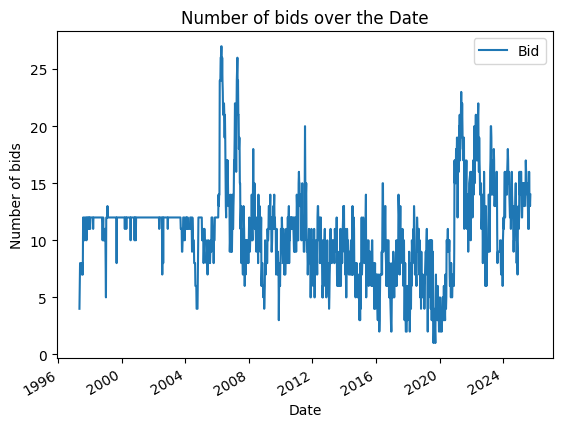

In [8]:
# Visualize the number of trades by time
df[["Bid", "Date"]].groupby("Date").count().plot()
plt.ylabel('Number of bids')
plt.title('Number of bids over the Date')

The dataset covers the period from 1996 to 2024. Data are relatively sparse between 1996 and 2004, with the number of observations peaking around 2005–2008. It decrease from 2018 and increase in 2020.

Text(0.5, 1.0, 'Number of bids over the Date group by Company')

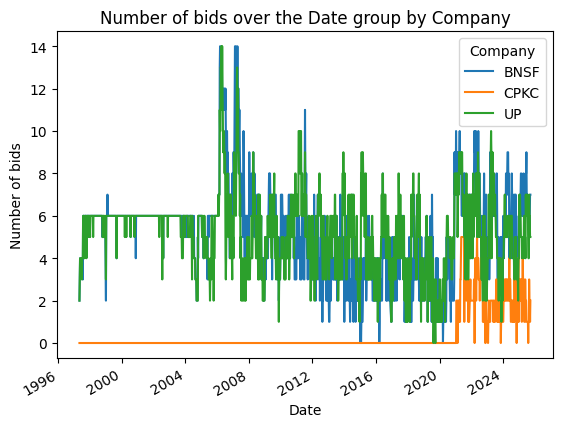

In [9]:
# Visualize the number of trades by time group by Company
df[["Bid", "Date", "Company"]].groupby(['Date',"Company"]).count().reset_index().pivot(index="Date", columns="Company", values="Bid").fillna(0).plot()
plt.ylabel('Number of bids')
plt.title('Number of bids over the Date group by Company')

The amounts of bid trading is similar in BNSF and UP, but the CPKC (started up at 1881) only has trades after 2020. It's might because this company start trading the cars after 2020. It might cause the spare data.

Text(0.5, 1.0, 'Average dollar amount (per car) of the bid/offer.')

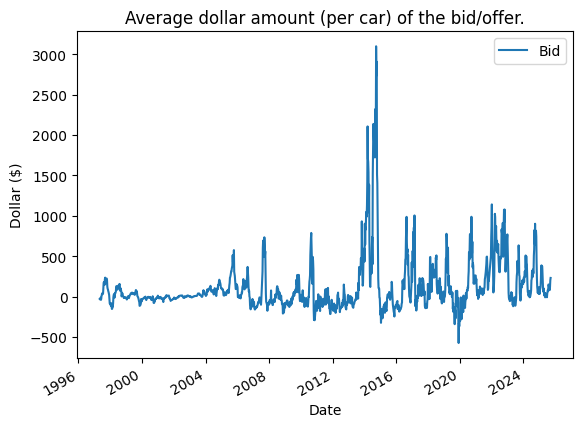

In [10]:
# Visualize the trading amount of bids by time
df[["Bid", "Date"]].groupby("Date").mean().plot()
plt.ylabel('Dollar ($)')
plt.title('Average dollar amount (per car) of the bid/offer.')

The amount of the cars is almost less than 1000 during 1996-2025, but it s get the peak from 1000-3000. So the price of the cars had impact by the different time period.

Text(0.5, 1.0, 'Average dollar amount (per car) of the bid/offer group by Company.')

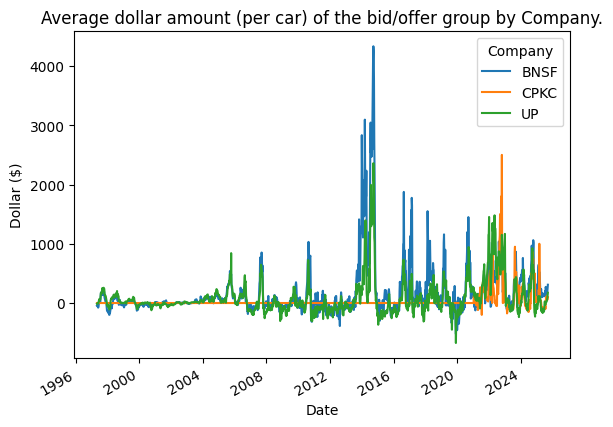

In [11]:
# Visualize the trading amount of bids by time group by company
df[["Bid", "Date", "Company"]].groupby(['Date',"Company"]).mean().reset_index().pivot(index="Date", columns="Company", values="Bid").fillna(0).plot()
plt.ylabel('Dollar ($)')
plt.title('Average dollar amount (per car) of the bid/offer group by Company.')

The company BNSF and UP's price almost follow the time trends, and the CPKC only trades after 2021.

In [12]:
# Distribution description of 'Company','Near-Month Indicator', 'Train_Type'
cols = ['Company','Near-Month Indicator', 'Train_Type']
for i in cols:
    print("=" * 80)
    print(i)
    print("=" * 80)

    summary = pd.DataFrame({
        'Count Distribution': df[i].value_counts(),
        'Percentage Distribution': df[i].value_counts(normalize=True) * 100
    })
    print(summary)
    print("\n")

Company
         Count Distribution  Percentage Distribution
Company                                             
BNSF                   7593                48.427833
UP                     7562                48.230117
CPKC                    524                 3.342050


Near-Month Indicator
                      Count Distribution  Percentage Distribution
Near-Month Indicator                                             
False                              11135                 71.01856
True                                4544                 28.98144


Train_Type
             Count Distribution  Percentage Distribution
Train_Type                                              
Non_Shuttle                9020                57.529179
Shuttle                    6659                42.470821




For Near-month Indicator, most of bids or train couldn't deliver in near month; for the train-type, Non_shuttle and shuttle is almost balanced

In [13]:
# Drop the redundant columns and get dummies for categories columns
clean_df = pd.get_dummies(df.drop(["Year-Month Bid For", "Date"], axis=1), columns=["Company", "Train_Type"], drop_first=True)
clean_df

,Week,Month,Year,Month Bid For,Year Bid For,Near-Month Indicator,Bid,Company_CPKC,Company_UP,Train_Type_Shuttle
0,18,5,1997,5,1997,True,-95.00,False,False,False
1,18,5,1997,8,1997,False,0.00,False,False,False
2,18,5,1997,5,1997,True,-28.00,False,True,False
3,18,5,1997,8,1997,False,2.00,False,True,False
4,20,5,1997,5,1997,True,-83.00,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15674,37,9,2025,9,2025,True,350.00,False,True,True
15675,37,9,2025,10,2025,True,37.50,False,True,False
15676,37,9,2025,10,2025,True,283.33,False,True,True
15677,37,9,2025,11,2025,False,100.00,False,True,False


## Baseline Model

we use LinearRegression as our base line model.

In [14]:
X = clean_df.drop("Bid", axis=1)
y = clean_df.Bid

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  152713.85794194092
MAPE:  3.3759294025769388e+16
R2:  0.07584950413414593


Text(0, 0.5, 'Predicted Bid')

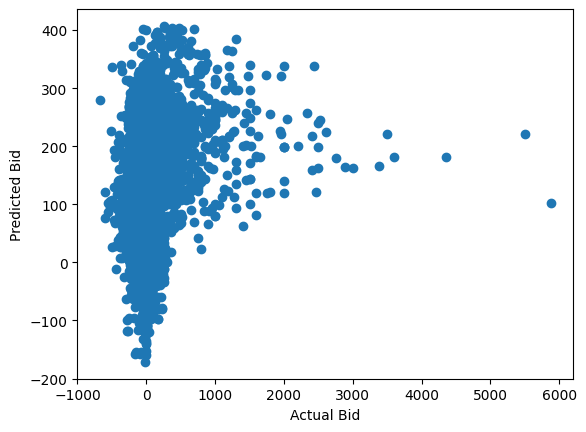

In [16]:
plt.scatter(x = y_test, y = y_pred)
plt.xlabel("Actual Bid")
plt.ylabel("Predicted Bid")